In [43]:
%%capture
!pip install kagglehub

In [44]:
import kagglehub
# Download latest version
path = kagglehub.dataset_download("olistbr/brazilian-ecommerce")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'brazilian-ecommerce' dataset.
Path to dataset files: /kaggle/input/brazilian-ecommerce


In [45]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
# wrangle function
def wrangle(filepath:str):
    df = pd.read_csv(filepath)
    print(df.columns)
    print(df.isnull().sum()/len(df))
    print(df.shape)
    return df

# wrangle orders

In [47]:
df_orders = wrangle(f"{path}/olist_orders_dataset.csv")

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')
order_id                         0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.001609
order_delivered_carrier_date     0.017930
order_delivered_customer_date    0.029817
order_estimated_delivery_date    0.000000
dtype: float64
(99441, 8)


In [48]:
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [49]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [50]:
df_orders.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:06:07,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-14 20:02:44,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


# wrangle customers

In [51]:
df_customers = wrangle(f"{path}/olist_customers_dataset.csv")

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')
customer_id                 0.0
customer_unique_id          0.0
customer_zip_code_prefix    0.0
customer_city               0.0
customer_state              0.0
dtype: float64
(99441, 5)


In [52]:
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [53]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [54]:
df_customers.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


# wrangle products

In [55]:
df_products = wrangle(f"{path}/olist_products_dataset.csv")

Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')
product_id                    0.000000
product_category_name         0.018512
product_name_lenght           0.018512
product_description_lenght    0.018512
product_photos_qty            0.018512
product_weight_g              0.000061
product_length_cm             0.000061
product_height_cm             0.000061
product_width_cm              0.000061
dtype: float64
(32951, 9)


In [56]:
df_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [57]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [58]:
df_products.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


# wrangle order reviews

In [59]:
df_order_reviews = wrangle(f"{path}/olist_order_reviews_dataset.csv")

Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')
review_id                  0.000000
order_id                   0.000000
review_score               0.000000
review_comment_title       0.883415
review_comment_message     0.587025
review_creation_date       0.000000
review_answer_timestamp    0.000000
dtype: float64
(99224, 7)


In [60]:
df_order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [61]:
df_order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [62]:
df_order_reviews.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


# User Story 1: The Schema Builder

1. Join Reviews to Orders on 'order_id'

In [63]:
df_master = df_orders.merge(df_order_reviews, on='order_id', how='left')

2. Join Customers to Orders on 'customer_id'

In [64]:
df_master = df_master.merge(df_customers, on='customer_id', how='left')

In [65]:
df_master.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,359d03e676b3c069f62cadba8dd3f6e8,5.0,NaN,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,e50934924e227544ba8246aeb3770dd4,5.0,NaN,NaN,2018-02-17 00:00:00,2018-02-18 13:02:51,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [66]:
df_master.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state'],
      dtype='object')

# Story 2: The "Real" Delay Calculator

In [67]:
# Convert date columns to proper datetime format
date_cols = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]

for col in date_cols:
    df_master[col] = pd.to_datetime(df_master[col])

# Calculate Days_Difference
# Formula: Estimated Date - Actual Date
# Positive = Early/On Time
# Negative = Late
df_master['Days_Difference'] = (df_master['order_estimated_delivery_date'] - df_master['order_delivered_customer_date']).dt.days

# Classify statuses
def classify_delivery(days_diff):
    if pd.isna(days_diff):
        return 'Not Delivered' # Handle missing values (User Story 2 req)

    if days_diff >= 0:
        return 'On Time'
    elif days_diff >= -5:
        return 'Late'
    else:
        return 'Super Late'

df_master['Delivery_Status'] = df_master['Days_Difference'].apply(classify_delivery)

#distribution of statuses
print(df_master['Delivery_Status'].value_counts(normalize=True)*100)

Delivery_Status
On Time          89.146132
Super Late        4.235339
Late              3.631291
Not Delivered     2.987239
Name: proportion, dtype: float64


<Axes: xlabel='Delivery_Status'>

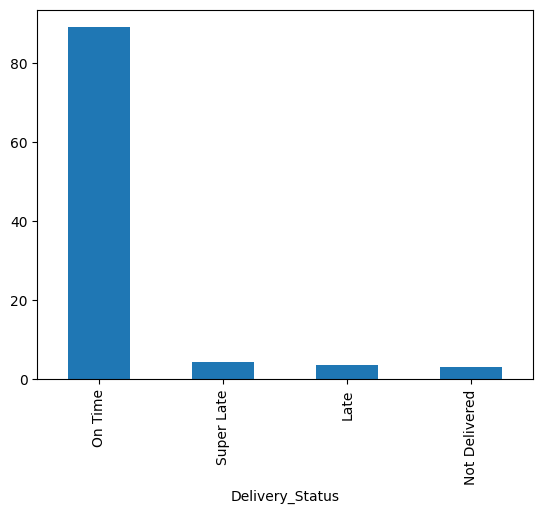

In [68]:
# df_master['Delivery_Status'].value_counts().plot(kind='bar')
# Plot as percentages
(df_master['Delivery_Status'].value_counts(normalize=True) * 100).plot(kind='bar')

## User Story 2 Conclusion
 #### We can conclude that **89%** of the time, deliveries actually arrive on time. Put differently, we are NOT Over-promisng

# Story 3: The Geographic Heatmap

I want to see which specific States (customer_state) have the highest percentage of late deliveries,
So that I can focus my repair efforts on the worst regions.

Top 5 Worst Performing States (% Late + Super Late):
Delivery_Status  Total_Late_Percent
customer_state                     
AL                        23.021583
MA                        18.774967
PI                        15.322581
CE                        14.712472
SE                        14.571429


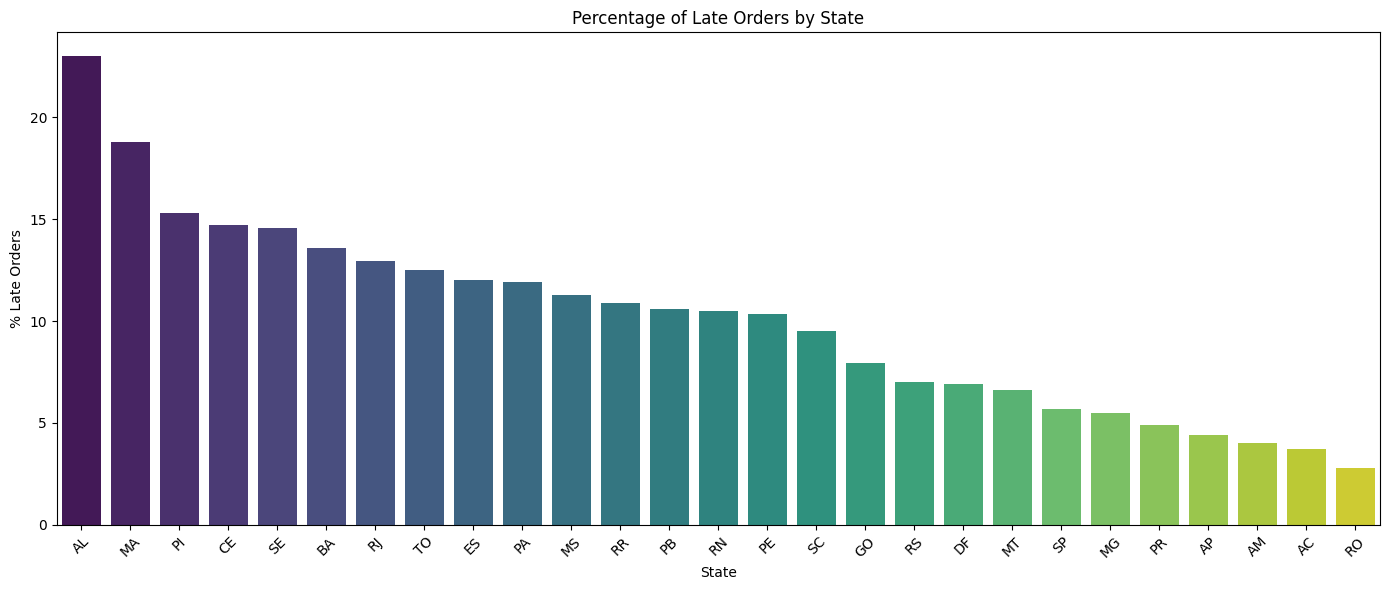

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate % of late orders per distinct State
# We group by customer_state and calculate the percentage of statuses
state_performance = df_master.groupby('customer_state')['Delivery_Status'].value_counts(normalize=True).unstack().fillna(0)

# Create a 'Total_Late_Percent' column (Late + Super Late)
cols = state_performance.columns
late_cols = [c for c in cols if 'Late' in c] # 'Late', 'Super Late'
state_performance['Total_Late_Percent'] = state_performance[late_cols].sum(axis=1) * 100

# Sort by worst performing
state_performance_sorted = state_performance.sort_values('Total_Late_Percent', ascending=False)

print("Top 5 Worst Performing States (% Late + Super Late):")
print(state_performance_sorted[['Total_Late_Percent']].head())

# Visualizing
plt.figure(figsize=(14, 6))
sns.barplot(x=state_performance_sorted.index, y=state_performance_sorted['Total_Late_Percent'], palette='viridis',
           hue=state_performance_sorted.index)
plt.title('Percentage of Late Orders by State')
plt.ylabel('% Late Orders')
plt.xlabel('State')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Story 3 Conclusion
 #### -We can conclude that states **AL**, **MA**, **PI** , **SE**, and **BA** have the highest rate of late deliveries

# Story 4: The Sentiment Correlation

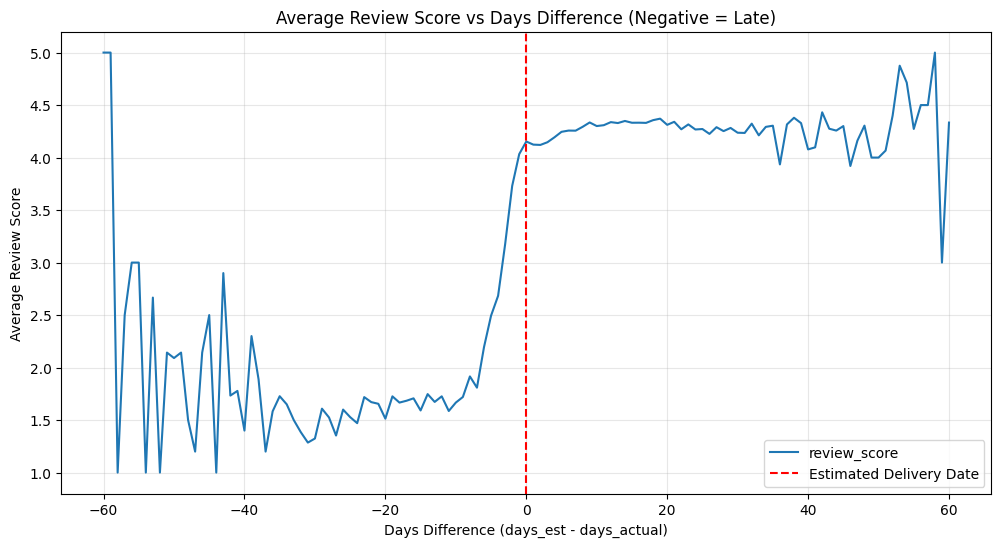

Average Review Score by Delivery Status:
Delivery_Status
Not Delivered    1.761257
Super Late       1.788195
Late             3.460658
On Time          4.293578
Name: review_score, dtype: float64


/tmp/ipython-input-3358813021.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_scores.index, y=avg_scores.values, palette='RdYlGn')


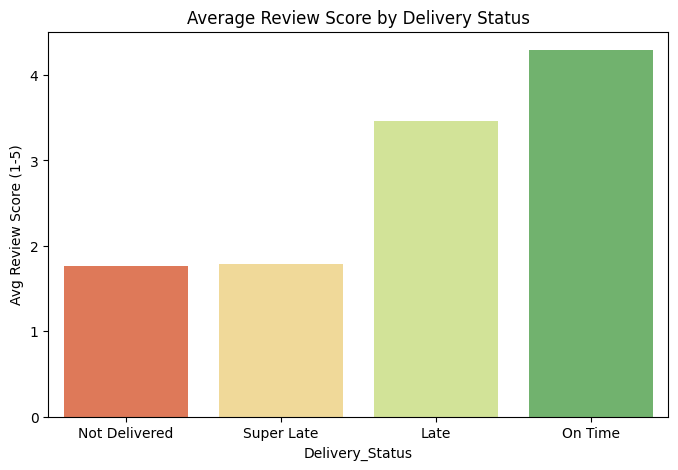

In [70]:
# 1. Visualize Delivery Delay vs Average Review Score
# Filter for delivered orders and valid review scores
df_sentiment = df_master.dropna(subset=['review_score', 'Days_Difference']).copy()

# Group by Days_Difference to see the trend
# Focusing on a reasonable window (e.g., +/- 60 days) to avoid outliers skewing the plot
avg_review_by_delay = df_sentiment.groupby('Days_Difference')['review_score'].mean()
avg_review_by_delay = avg_review_by_delay.loc[-60:60]

plt.figure(figsize=(12, 6))
avg_review_by_delay.plot()
plt.title('Average Review Score vs Days Difference (Negative = Late)')
plt.ylabel('Average Review Score')
plt.xlabel('Days Difference (days_est - days_actual)')
plt.axvline(x=0, color='r', linestyle='--', label='Estimated Delivery Date')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 2. Avg Review Score for On Time vs Late (Comparison)
avg_scores = df_master.groupby('Delivery_Status')['review_score'].mean().sort_values()
print("Average Review Score by Delivery Status:")
print(avg_scores)

plt.figure(figsize=(8, 5))
sns.barplot(x=avg_scores.index, y=avg_scores.values, palette='RdYlGn')
plt.title('Average Review Score by Delivery Status')
plt.ylabel('Avg Review Score (1-5)')
plt.show()

#### Story 4 Conclusion
 #### - we can conclude that late deliveries correlates positively to bad reviews and consequently we can let the CEO know that it is a logistics problem

# Story 5- Bonus User Story: The "Translation" Challenge

In [71]:
# we could use a map

In [72]:
# We need 'olist_order_items_dataset.csv' to link orders to products
# We need 'product_category_name_translation.csv' for English names

df_items = wrangle(f"{path}/olist_order_items_dataset.csv")
df_translation = wrangle(f"{path}/product_category_name_translation.csv")

# 2. Schema Join for Products / Items
# We need to expand our master dataset because one order can have multiple items
# Current df_master is 1 row per order (mostly).
# Joining with Items will create 1 row per Item.

df_full = df_master.merge(df_items, on='order_id', how='left')

# Join with products
df_full = df_full.merge(df_products, on='product_id', how='left')

# Join with translation
df_full = df_full.merge(df_translation, on='product_category_name', how='left')

print(f"Full Dataset Shape (with Items): {df_full.shape}")

# Average Review Score by Product Category (English)
# Use 'product_category_name_english'
cat_review = df_full.groupby('product_category_name_english')['review_score'].mean().sort_values()

print("Bottom 5 Categories (Lowest Review Score)")
print(cat_review.head(5))

print("Top 5 Categories (Highest Review Score) ")
print(cat_review.tail(5))

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')
order_id               0.0
order_item_id          0.0
product_id             0.0
seller_id              0.0
shipping_limit_date    0.0
price                  0.0
freight_value          0.0
dtype: float64
(112650, 7)
Index(['product_category_name', 'product_category_name_english'], dtype='object')
product_category_name            0.0
product_category_name_english    0.0
dtype: float64
(71, 2)
Full Dataset Shape (with Items): (114092, 35)
Bottom 5 Categories (Lowest Review Score)
product_category_name_english
security_and_services    2.500000
diapers_and_hygiene      3.256410
office_furniture         3.493183
home_comfort_2           3.629630
fashion_male_clothing    3.641221
Name: review_score, dtype: float64
Top 5 Categories (Highest Review Score) 
product_category_name_english
flowers                      4.419355
costruction_tools_tools      4.

In [73]:
# Define category groups for analysis
furniture_categories = [
    'furniture_decor',
    'office_furniture',
    'furniture_living_room',
    'furniture_bedroom',
    'kitchen_dining_laundry_garden_furniture',
    'furniture_mattress_and_upholstery'
]

electronics_categories = [
    'electronics',
    'computers_accessories',
    'computers',
    'telephony',
    'fixed_telephony',
    'tablets_printing_image',
    'consoles_games',
    'audio',
    'small_appliances',
    'home_appliances',
    'home_appliances_2',
    'air_conditioning'
]

print(f"Furniture Categories: {len(furniture_categories)}")
print(f"Electronics Categories: {len(electronics_categories)}")

Furniture Categories: 6
Electronics Categories: 12


--- Furniture vs. Electronics Shipping Analysis ---
                Late Rate (%)  Avg Days Difference  Avg Review Score  \
Category_Group                                                         
Furniture            8.187822            11.292428          3.843716   
Electronics          7.831044            11.020756          3.974425   

                Total Orders  
Category_Group                
Furniture              11053  
Electronics            19295  


/tmp/ipython-input-2945954605.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=group_analysis.index, y=group_analysis['Late Rate (%)'], palette=['salmon', 'skyblue'])
/tmp/ipython-input-2945954605.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=group_comparison.index if 'group_comparison' in locals() else group_analysis.index, y=group_analysis['Avg Days Difference'], palette=['salmon', 'skyblue'])


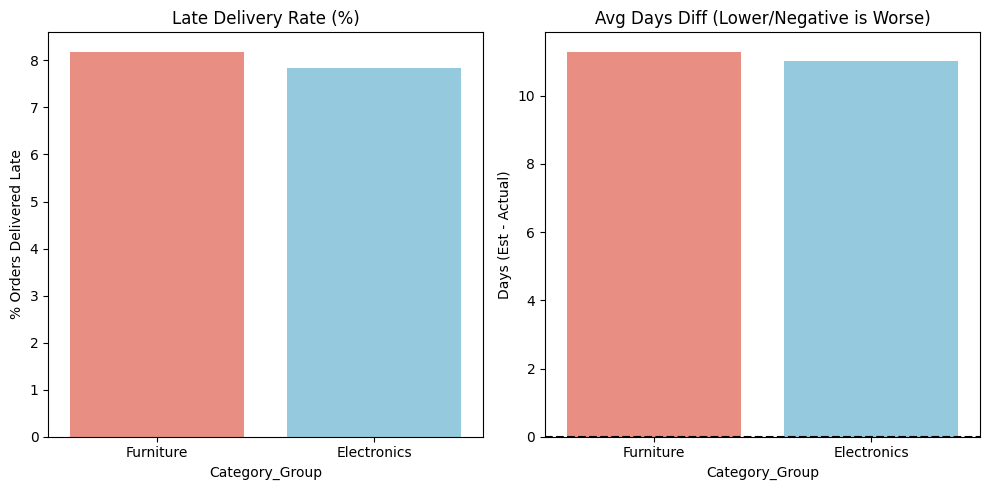


Conclusion: Furniture is harder to ship based on a higher late delivery rate.


In [74]:
# Create a new column 'Category_Group' based on the lists
def assign_group(category):
    if category in furniture_categories:
        return 'Furniture'
    elif category in electronics_categories:
        return 'Electronics'
    else:
        return 'Other'

df_full['Category_Group'] = df_full['product_category_name_english'].apply(assign_group)

# Filter for only Furniture and Electronics for direct comparison
df_comparison = df_full[df_full['Category_Group'].isin(['Furniture', 'Electronics'])].copy()

# Calculate 'Late_Flag' (1 if Late/Super Late, 0 otherwise) for easy averaging
df_comparison['is_late'] = df_comparison['Delivery_Status'].isin(['Late', 'Super Late']).astype(int)

# Aggregate metrics
group_analysis = df_comparison.groupby('Category_Group').agg({
    'is_late': 'mean',          # Late Delivery Rate
    'Days_Difference': 'mean',  # Average Delay (negative means late)
    'review_score': 'mean',     # Avg Customer Satisfaction
    'order_id': 'count'         # Volume
}).sort_values('is_late', ascending=False)

# Rename for clarity
group_analysis = group_analysis.rename(columns={
    'is_late': 'Late Rate (%)',
    'Days_Difference': 'Avg Days Difference',
    'review_score': 'Avg Review Score',
    'order_id': 'Total Orders'
})

# Convert Late Rate to percentage for display
group_analysis['Late Rate (%)'] = group_analysis['Late Rate (%)'] * 100

print("--- Furniture vs. Electronics Shipping Analysis ---")
print(group_analysis)

# Visualization
plt.figure(figsize=(10, 5))

# Plot 1: Late Rate
plt.subplot(1, 2, 1)
sns.barplot(x=group_analysis.index, y=group_analysis['Late Rate (%)'], palette=['salmon', 'skyblue'])
plt.title('Late Delivery Rate (%)')
plt.ylabel('% Orders Delivered Late')

# Plot 2: Average Days Difference
plt.subplot(1, 2, 2)
sns.barplot(x=group_comparison.index if 'group_comparison' in locals() else group_analysis.index, y=group_analysis['Avg Days Difference'], palette=['salmon', 'skyblue'])
plt.title('Avg Days Diff (Lower/Negative is Worse)')
plt.ylabel('Days (Est - Actual)')
plt.axhline(0, color='black', linestyle='--')

plt.tight_layout()
plt.show()

# Conclusion
hardest = group_analysis['Late Rate (%)'].idxmax()
print(f"\nConclusion: {hardest} is harder to ship based on a higher late delivery rate.")

#### Story 5 Conclusion
 #### from the products i have classfied as furniture and those i have classified as electronics **Furniture** is slightly harder to ship than **ELectronics**. The margin is however very marginal and negligible. ie bare a **1%** difference in late deliveries

# 6. The "Candidate's Choice" Challenge

In [75]:
# --- User Story 6: Candidate's Choice (Seller Performance Audit) ---
# Question: Are specific sellers responsible for the majority of late deliveries?
# Justification: Identifying worst-performing sellers allows for targeted interventions or offboarding.

# We have 'seller_id' in df_full (from items table)
# Calculate Late % per Seller
# Filter: Only consider sellers with > 30 orders to avoid noise from one-off sales

seller_perf = df_full.groupby('seller_id').agg({
    'Delivery_Status': lambda x: (x.isin(['Late', 'Super Late'])).mean(),
    'order_id': 'count'
}).rename(columns={'Delivery_Status': 'Late_Rate', 'order_id': 'Order_Count'})

# Filter for significant volume
major_sellers = seller_perf[seller_perf['Order_Count'] > 30].sort_values('Late_Rate', ascending=False)

print("Top 10 Worst Performing Sellers (>30 orders):")
print(major_sellers.head(10))

Top 10 Worst Performing Sellers (>30 orders):
                                  Late_Rate  Order_Count
seller_id                                               
2709af9587499e95e803a6498a5a56e9   0.489362           47
ede0c03645598cdfc63ca8237acbe73d   0.320000           50
54965bbe3e4f07ae045b90b0b8541f52   0.302326           86
835f0f7810c76831d6c7d24c7a646d4d   0.300000           50
ad781527c93d00d89a11eecd9dcad7c1   0.272727           44
2a1348e9addc1af5aaa619b1a3679d6b   0.272727           55
71039d19d4303bf9054d69e9a9236699   0.263158           38
66e0557ecc2b4dbea057e93f215f68d8   0.258065           31
6039e27294dc75811c0d8a39069f52c0   0.250000           76
602044f2c16190c2c6e45eb35c2e21cb   0.250000           60


/tmp/ipython-input-954386909.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_sellers['Late_Rate'] * 100, y=top_10_sellers.index, palette='Reds_r')


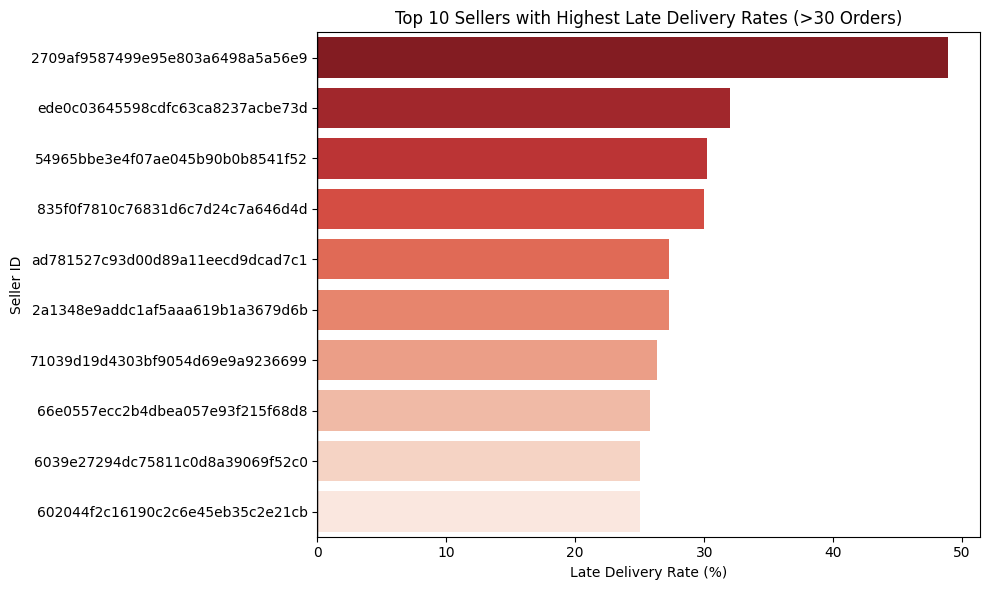

In [76]:
# Visualize Top 10 Worst Sellers
top_10_sellers = major_sellers.head(10)

plt.figure(figsize=(10, 6))
# Using horizontal bar plot for readable Seller IDs
sns.barplot(x=top_10_sellers['Late_Rate'] * 100, y=top_10_sellers.index, palette='Reds_r')

plt.title('Top 10 Sellers with Highest Late Delivery Rates (>30 Orders)')
plt.xlabel('Late Delivery Rate (%)')
plt.ylabel('Seller ID')
plt.axvline(x=0, color='black', linewidth=1) # Baseline
plt.tight_layout()
plt.show()

### Story 6 Conclusion
 #### We can see that a particular crop of **sellers** do not have a good record becuase they keep deliverying at late rates. Exponging most of these sellers will mean that we are able to reduce our percentage of late rates.
  ### so consequently we could say that all those with order counts for late deliveries up to 30 should be removed be removed

In [77]:
df_full.to_csv('df_full.csv')

# Executive Summary
##### -my analysis of data reveals that 89% of orders arrive on time, indicating the company is not over-promising on delivery expectations. However, late deliveries have a significant negative impact,i.e  orders delivered late receive substantially lower review scores, confirming that logistics performance directly drives customer satisfaction
##### -Geographically, five states (AL, MA, PI, SE, and BA) experience the highest late delivery rates and should be prioritized for logistics improvements.
##### -When comparing product categories, Furniture shows only a marginal (~1%) higher late rate than Electronics, suggesting product type is not a major driver of delays
##### -A subset of underperforming sellers account for disproportionately high late delivery rates, presenting a clear opportunity to improve overall performance through targeted seller interventions or offboarding

# Technical Explanation
### Data Cleaning Approach
##### -Wrangle Function: Created a reusable wrangle() function that loads CSV files while immediately displaying column names, null value percentages, and dataset shape for quick quality assessment.
##### -Date Handling: Converted all date columns (order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date) from strings to proper datetime objects using pd.to_datetime().
##### -Missing Value Strategy: Orders without actual delivery dates (canceled/unavailable) were explicitly flagged as "Not Delivered" rather than dropped, preserving data integrity while excluding them from delay calculations.
##### Derived Features: Created Days_Difference (estimated minus actual delivery date) and Delivery_Status classification ("On Time", "Late", "Super Late") to enable categorical analysis.
#### -Candidate's Choice: Seller Performance Audit
###### -Business Rationale: While geographic and product-level analysis identifies where delays occur, identifying who causes them enables direct intervention. Poor-performing sellers represent a controllable variable.
###### -Methodology: Aggregated late delivery rates per seller_id, filtering for sellers with >30 orders to eliminate statistical noise from low-volume sellers.
##### -Key Insight: A subset of high-volume sellers consistently underperform, making them candidates for targeted improvement programs or potential offboarding to reduce overall late delivery rates.

In [78]:
print("EVERY CELL RUNS")

EVERY CELL RUNS
